In [1]:
import matplotlib.pyplot as plt
import time


#these are helper methods that I have made and used on past projects
#none of these methods are part of the requirements, but they are 
#essential to making them work as effectively as possible


def text2arr(text):
    processed_string_arr = []
    for letter in text:
        if letter.isalpha():
            processed_string_arr.append(letter.upper())
    return processed_string_arr
#At this point, processed_string should have 
#the original string with only the characters and all capitalized


def arr2text(array):
    processed_string = ''
    for number in array:
        processed_string+=(chr(number))
    return processed_string

def arrtext2text(array):
    processed_string = ''
    for letter in array:
        processed_string+=(letter)
    return processed_string

def letter_frequency(text):
    dictionary = {}
    for letter in text:
        if letter in dictionary:
            dictionary[letter]+=1
        else:
            dictionary[letter]=1
    length = len(text)
    scaled_values =[]
    for value in dictionary.values():
        scaled_values.append((value/length)*100)
    plt.bar(dictionary.keys(),scaled_values)
    plt.show()

In [2]:
#RC4 initialization
#it will take an input of a key text

class RC4:
    def __init__(self, key):
        self.key = key
        
        self.i=0 
        self.j=0
        
        self.S = [None]*256
        KeyArr = [None]*256
        keyLength = len(self.key)

        
        #S and KeyArr initialization
        for number in range(256):
            self.S[number]=number
            KeyArr[number] = ord(self.key[number % keyLength])

        #Initial permutation of S
        helper=0
        for number in range(256):
            helper = (helper + self.S[number] + KeyArr[number]) % 256
            self.swapper(self.S, number, helper)
            
        print('Initial Permutation of S: ', self.S)
        print('\n\n')
        
        # randKey = nextCode(S)
        
        
        
    #code to generate they key string
    def next_code(self):
        self.i = (self.i+1) % 256
        self.j = (self.j+self.S[self.i]) % 256
        
        self.swapper(self.S, self.i, self.j)
        
        keyIndex = (self.S[self.i] + self.S[self.j]) % 256
        randKey=self.S[keyIndex]
        
        print('i:'+ str(self.i) + ' j:'+ str(self.j), '\n State:'+str(self.S)+'\n')
        
        return randKey


    #this is adition code borrowed from GF(2^8) project
    def xor(self, a,b):
        #efficient addition, simple bit-wise XOR
        if a ==0:
            return b

        if b ==0:
            return a

        return a^b
    
    
    def encodeDecode(self, array):
        returnArr = []*len(array)
        for element in array:
            returnArr.append(self.xor(ord(element), self.next_code()))                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

        return returnArr

    
    #helper method to switch array elements
    def swapper(self, array, i, j):
        temp = array[j]
        array[j] = array[i]
        array[i] = temp 


    
def rc4_D_and_E(text, key):
            
    array = text2arr(text)
    keyArr = text2arr(key)
    
    print('Initial text: '+arrtext2text(array))
    start_e = time.perf_counter()
    rc4_e = RC4(keyArr)
    encrypted = rc4_e.encodeDecode(array)
    end_e = time.perf_counter()
    time2e = end_e - start_e
     
    encrypted_string = arr2text(encrypted)
    print('Encrypted string: ', encrypted_string)
    
    encrypted_length = len(encrypted_string)
    
    time2encrypt1Char = time2e / encrypted_length
            
    # start_d = time.perf_counter()        
    rc4_d = RC4(keyArr)
    decrypted = rc4_d.encodeDecode(encrypted_string)
    
    decrypted_string = arr2text(decrypted)
    print('Decrypted string: ',decrypted_string)
    # end_d = time.perf_counter()
    # time2d = end_d - start_d
            
    #frequency plot
    print(letter_frequency(decrypted_string))
    print(letter_frequency(encrypted_string))
    print('Time to encrypt 1 char: '+ str(time2encrypt1Char) +' seconds')
    

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



i:108 j:2 
 State:[107, 162, 251, 240, 249, 197, 188, 58, 165, 14, 120, 132, 204, 178, 182, 125, 69, 73, 110, 159, 225, 247, 108, 206, 37, 135, 149, 101, 233, 64, 148, 218, 111, 164, 59, 113, 24, 77, 189, 175, 45, 18, 126, 124, 35, 123, 118, 152, 95, 8, 100, 252, 2, 194, 222, 140, 158, 250, 230, 96, 157, 176, 112, 119, 185, 109, 187, 151, 47, 41, 130, 16, 61, 17, 245, 170, 49, 94, 42, 136, 12, 103, 23, 99, 153, 213, 235, 179, 215, 127, 93, 239, 11, 191, 114, 201, 190, 44, 1, 72, 52, 46, 212, 184, 80, 25, 36, 227, 15, 246, 90, 163, 4, 219, 253, 207, 181, 26, 121, 117, 13, 198, 79, 174, 255, 214, 211, 144, 50, 155, 39, 85, 92, 224, 82, 106, 67, 199, 115, 51, 223, 146, 228, 195, 27, 248, 33, 9, 131, 169, 53, 10, 122, 38, 150, 83, 71, 98, 147, 134, 74, 22, 226, 229, 221, 133, 7, 160, 177, 237, 88, 205, 20, 166, 56, 143, 171, 3, 30, 168, 193, 208, 21, 202, 217, 86, 54, 234, 180, 254, 81, 243, 238, 145, 241, 32, 31, 6, 129, 43, 63, 244, 19, 68, 172, 242, 84, 62, 116, 232, 91, 76, 70, 65, 28,

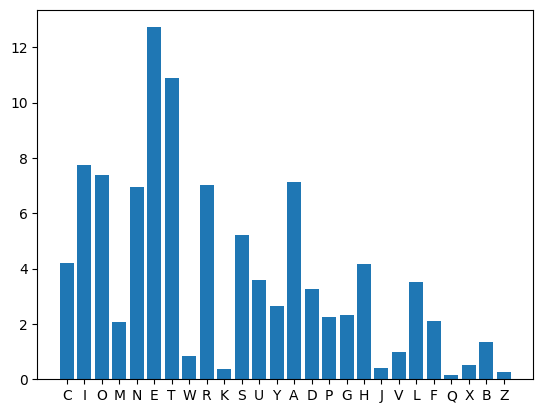

None


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 155 (\x9b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 156 (\x9c) missing from curre

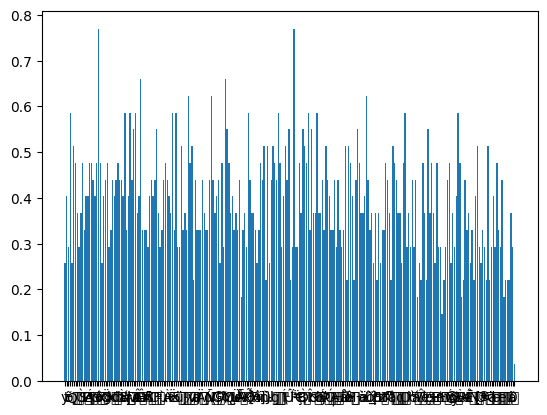

None
Time to encrypt 1 char: 6.808307368115077e-05 seconds


In [3]:


text = """
CIIC5018 / ICOM5018
Network Security and Cryptography

Project 6 – RC4 and Stream Cipher 

Overview 

In this project, you will need to design and implement RC4 and a stream cipher, and then compare the frequency of characters in the plaintext and cyphertext. The programming language is Python and the programming platform is Jupyter notebook.

Document requirements

To work on the exercise, you will need to prepare three documents following the guidelines below. 

1.	A design document
a.	Cover page
i.	It shall include the title of the document, your name, student ID, department and university information, etc.
b.	Table of content
c.	Section 1: The RC4 class
i.	The class shall store the following values
1.	The state S is an array of 256 integers, each integer is in range [0, 255]
2.	Parameter i
3.	Parameter j
ii.	The class shall contain the following functions
1.	Initializer
2.	Next_code
3.	XOR_code
4.	EncDec_array
d.	Section 2: The initializer of the RC4 class
i.	To initialize an RC4 object, you need to use a key that contains up to 256 bytes
ii.	The initializer must initialize S, i, j according to the standard 
e.	Section 3: Next_code
i.	This function returns a new random integer in range [0, 255]
ii.	The internal values will be updated
iii.	All procedures must follow the standard
f.	Section 4: XOR_Code
i.	This function encrypt/decrypt an input byte by XOR it with a new code returned by Next_code
ii.	The return is an integer in range [0, 255]
g.	Section 5: EncDec_array
i.	This function encrypt/decrypt a whole array of bytes 
ii.	The input is an array of integers
iii.	The output is an array of integers after calling XOR_Code for each byte
h.	References
i.	At least 5 references
ii.	Including a link to your YouTube video.
2.	A Python program saved in one Jupyter notebook file
a.	The RC4 class and all functions shall be implemented using Python.
b.	You shall demonstrate the initial permutation of state
c.	You shall demonstrate (state, i, j) before and after generating a random byte
d.	To verify your stream cipher, you must do the following
i.	Use the same key string to initialize two RC4 objects (RC4-E, RC4-D)
ii.	Converting a sting of text (S1) to an array of bytes (A1)
iii.	Encrypt A1 using RC4-E and get array A2
iv.	Decrypt A2 using RC4-D and get array A3
v.	Covert A3 to a string (S2), which shall the same as S1
e.	Use this document as a string to generate an array of bytes for ciphertext, then use the previous code to show the frequency of 256 bytes.
f.	Determine the time to encrypt one character.
i.	You can record the total time to encrypt a large txt file, then divide the total amount of time by the total number of characters in the file.
3.	A Youtube video to walk through your code
a.	In the video, you shall go through Step 2.b to demonstrate the initial permutation of state
b.	In the video, you shall go through Step 2.c to demonstrate the states before and after generating a random byte
c.	In the video, you shall go through Step 2.d to demonstrate the correctness of your stream cipher
d.	In the video, you shall go through Step 2.e to show the frequency of bytes after using the stream cipher to encrypt a string of text
e.	In the video, you shall go through Step 2.f to show the time for encrypting a single character.
f.	Upload the video to youtube, set the video as private, then share it to me (Kejie.lu@upr.edu)


Submission

Submit a single zip file that includes:
1.	the design document 
2.	the Jupyter notebook

Evaluation

1.	Rubrics are used in the evaluation.
2.	You must carefully review all rubrics before preparing for the documents.

"""


rc4_D_and_E(text, 'IvanJacksonKey')
